In [30]:
#Importing necessary liabraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
data_price = pd.read_excel('/content/Sample_Data/Medibuddy Insurance Data Price.xlsx')

In [4]:
data_price.head()

,Policy no.,age,sex,bmi,charges in INR
0,PLC156898,19,female,27.900,16884.92400
1,PLC156907,18,male,33.770,1725.55230
2,PLC156916,28,male,33.000,4449.46200
3,PLC156925,33,male,22.705,21984.47061
4,PLC156934,32,male,28.880,3866.85520


In [5]:
data_personal_details = pd.read_excel('/content/Sample_Data/Medibuddy insurance data personal details.xlsx')

In [6]:
data_personal_details.head()

,Policy no.,children,smoker,region
0,PLC157006,0,no,southwest
1,PLC157033,1,no,southwest
2,PLC157060,0,no,southwest
3,PLC157087,1,no,southwest
4,PLC157186,5,no,southwest


In [9]:
#merge two dataset
# check is there any null values in given dataset
data_price.isnull().sum()

,0
Policy no.,0
age,0
sex,0
bmi,0
charges in INR,0


In [10]:
#do not have any null values present in data_price dataset
# check second dataset
data_personal_details.isnull().sum()

,0
Policy no.,0
children,0
smoker,0
region,0


In [12]:
#data_personal_details dataset also do not have any null values
# merge above two dataset as single dataset 'mainData'

In [17]:
mainData = pd.merge(data_price,data_personal_details, on = 'Policy no.', how = 'outer')

In [18]:
mainData.head()

,Policy no.,age,sex,bmi,charges in INR,children,smoker,region
0,PLC156898,19,female,27.900,16884.92400,0,yes,southwest
1,PLC156907,18,male,33.770,1725.55230,1,no,southeast
2,PLC156916,28,male,33.000,4449.46200,3,no,southeast
3,PLC156925,33,male,22.705,21984.47061,0,no,northwest
4,PLC156934,32,male,28.880,3866.85520,0,no,northwest


In [19]:
#check is there null record in mainData
mainData.isnull().sum()

,0
Policy no.,0
age,0
sex,0
bmi,0
charges in INR,0
children,0
smoker,0
region,0


In [20]:
#do not have any null record in mainData

Does the gender of the person matter for the company as a constraint for extending policies?

In [22]:
mainData.value_counts('sex')

,count
sex,
male,676
female,662


In [28]:
mainData.groupby('sex')['charges in INR'].mean()

,charges in INR
sex,
female,12569.578844
male,13956.751178


<Axes: xlabel='sex', ylabel='charges in INR'>

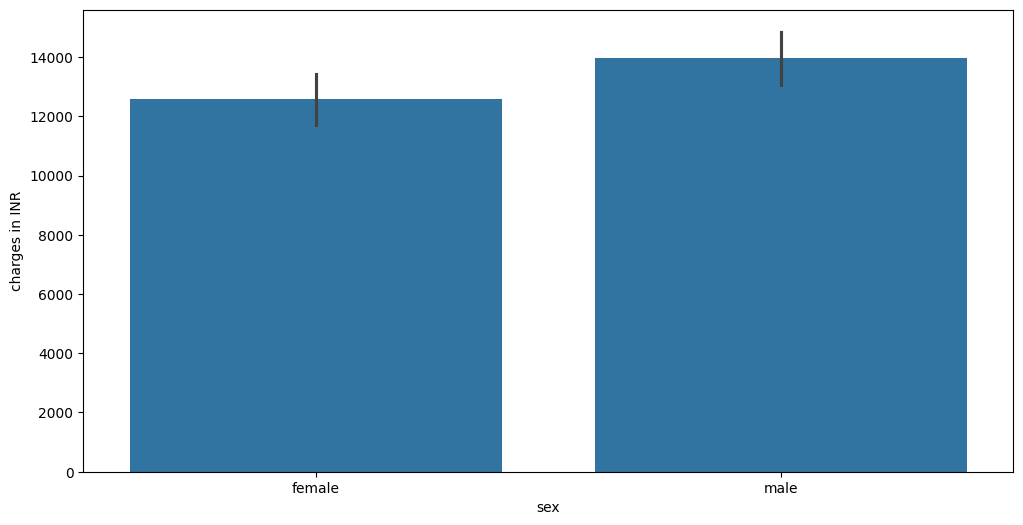

In [44]:
# Male are spending more amount or charges in INR campare to female on policies
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.barplot(x='sex',y='charges in INR', data=mainData)

Observations:
- The gender is a not a constraint for the compnay to give policy or not since neraly equal number of policies have been handed out to the both the genders
- However, the slight differnce can be seen interms of cost incurred calculating the mean cost of both the sex
- female	 12569.578844
-  male	   13956.751178
- making the medical policy for men 11.03% more expensive than women
